# 1.0 Visualizing Frequency Distributions

In [0]:
# Uploading files from your local file system

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


KeyboardInterrupt: ignored

In [0]:
import pandas as pd

# read the dataset
wnba = pd.read_csv("wnba.csv")

# cleaning the experience column
wnba.loc[wnba.Experience == 'R',"Experience"] = 0
wnba["Experience"] = wnba["Experience"].astype(int)

# create exp_ordinal column
wnba["Exp_ordinal"] = pd.cut(wnba.Experience,
       bins=[-1,0,3,5,10,100],
       labels=["rookie","Little experience","Experienced",
              "Very experienced","Veteran"])

# verify the results
wnba.Exp_ordinal.value_counts()

Little experience    42
Very experienced     37
Experienced          25
rookie               23
Veteran              16
Name: Exp_ordinal, dtype: int64

## 1.1 Visualizing Distributions

To find patterns in a frequency table we have to look up the frequency of each unique value or class interval and at the same time compare the frequencies. This process can get time consuming for tables with many unique values or class intervals, or when the frequency values are large and hard to compare against each other.

We can solve this problem by **visualizing** the data in the tables with the help of graphs. Graphs make it much easier to scan and compare frequencies, providing us with a single picture of the entire distribution of a variable.

Because they are easy to grasp and also eye-catching, graphs are a better choice over frequency tables if we need to present our findings to a non-technical audience.

In this lesson, we'll learn about three kinds of graphs:

- Bar plots.
- Pie charts.
- Histograms.

By the end of the mission, we'll know how to generate ourselves the graphs below, and we'll know when it makes sense to use each:

<center><img width="1000" src="https://drive.google.com/uc?export=view&id=1Rxdp-_t01VXmbJayEqTs4WOn4_-SAL6t"></center>

We've already learned about bar plots and histograms in the EDA lessons. In this mission we build upon that knowledge and discuss the graphs in the context of statistics by learning for what kind of variables each graph is most suitable for.


## 1.2 Bar Plots

For variables measured on a **nominal** or an **ordinal** scale it's common to use a **bar plot** to visualize their distribution. To generate a **bar plot** for the distribution of a variable we need two sets of values:

- One set containing the unique values.
- Another set containing the frequency for each unique value.

We can get this data easily from a frequency table. We can use **Series.value_counts()** to generate the table, and then use the [Series.plot.bar()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.bar.html) method on the resulting table to generate a **bar plot**. Using the same WNBA dataset we've been working with for the past missions, this is how we'd do that for the Pos (player position) variable:

```python
>> wnba['Pos'].value_counts().plot.bar()
```

<center><img width="400" src="https://drive.google.com/uc?export=view&id=1xPuz8XKNPPmGVdpMbqLcVNniySRGGuDc"></center>

The **Series.plot.bar()** method generates a vertical bar plot with the frequencies on the y-axis, and the unique values on the x-axis. To generate a horizontal bar plot, we can use the [Series.plot.barh() method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.barh.html):

```python
>> wnba['Pos'].value_counts().plot.barh()
```
<center><img width="400" src="https://drive.google.com/uc?export=view&id=1jQCBSxV20rDElban00Shk08R6ykT0oXk"></center>


As we'll see in the next screen, horizontal bar plots are ideal to use when the labels of the unique values are long.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- We've taken information from the **Experience** column, and created a new column named **Exp_ordinal**, which is measured on an ordinal scale. The new column has five unique labels, and each one corresponds to a number of years a player has played in WNBA:

<img width="300" src="https://drive.google.com/uc?export=view&id=1tqqE0d76Xk1baGCTWNEkYbJ9Muevfuw3">

- Create a **bar plot** to display the distribution of the **Exp_ordinal** variable:
  - Generate a frequency table for the **Exp_ordinal** variable.
  - Sort the table by unique labels in an ascending order using the techiques we learned in the previous mission.
  - Generate a bar plot using the **Series.plot.bar()** method.
  
  
  
  

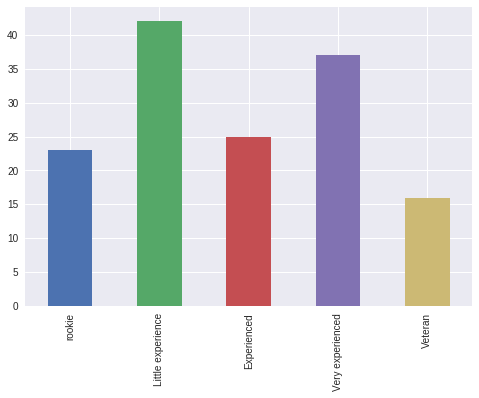

In [0]:
wnba['Exp_ordinal'].value_counts().sort_index(ascending=True).plot.bar()

## 1.3 Horizontal Bar Plots

One of the problems with the bar plot we built in the last exercise is that the tick labels of the x-axis are hard to read:

<img width="400" src="https://drive.google.com/uc?export=view&id=1gKTo1l94020_BBnk7ilS8WzllVFzYfFE">


To fix this we can rotate the labels, or we can switch to a horizontal bar plot. We can rotate the labels using the rot parameter of **Series.plot.bar()** method we used. The labels are already rotated at 90°, and we can tilt them a bit at 45°:

```python
>> wnba['Exp_ordinal'].value_counts().iloc[[3,0,2,1,4]].plot.bar(rot = 45)
```

<img width="400" src="https://drive.google.com/uc?export=view&id=1wD2TvUAm0fyBrVwWeE5KnTxuz2IS6RKf">

Slightly better, but we can do a better job with a horizontal bar plot. If we wanted to publish this bar plot, we'd also have to make it more informative by adding a title. This is what we'll do in the next exercise, but for now this is how we could do that for the **Pos** variable (note that we use the [Series.plot.barh()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.barh.html) method, not **Series.plot.bar()**):

```python
>> wnba['Pos'].value_counts().plot.barh(title = 'Number of players in WNBA by position')
```

<img width="400" src="https://drive.google.com/uc?export=view&id=1cNU5qtgeawYB-9ec-pC16XtN_6Rtb1Sd">



**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Create a horizontal bar plot to visualize the distribution of the **Exp_ordinal** variable.
  - Generate a frequency table for the **Exp_ordinal** variable.
  - Sort the table by unique labels in an ascending order.
  - Use the **Series.plot.barh()** method to generate the horizontal bar plot.
  - Add the following title to the plot: **Number of players in WNBA by level of experience.**

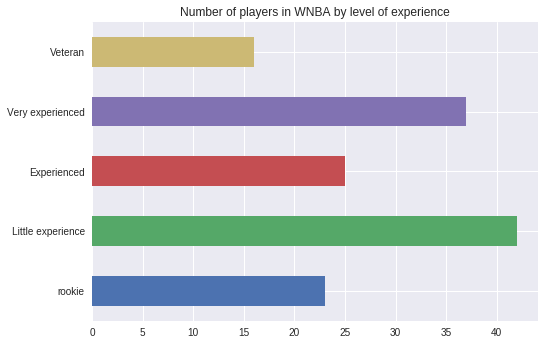

In [0]:
wnba['Exp_ordinal'].value_counts().sort_index(ascending=True).plot.barh(title="Number of players in WNBA by level of experience")

## 1.4 Pie Charts

Another kind of graph we can use to visualize the distribution of **nominal** and **ordinal** variables is a **pie chart**.

Just as the name suggests, a pie chart is structured pretty much like a regular pie: it takes the form of a circle and is divided in wedges. Each wedge in a pie chart represents a category (one of the unique labels), and the size of each wedge is given by the proportion (or percentage) of that category in the distribution.

<img width="600" src="https://drive.google.com/uc?export=view&id=1KKprkhfZaGe0CkLO0p3FzoJ6i71QrSv-">


We can generate pie charts using the [Series.plot.pie() method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.pie.html). This is how we'd do that for the **Pos** variable:

```python
>> wnba['Pos'].value_counts().plot.pie()
```

<img width="400" src="https://drive.google.com/uc?export=view&id=1MvVv73TYBDN5VNZ2gELxp5I4O3bn6UJC">


The main advantage of pie charts over bar plots is that they provide a much better sense for the relative frequencies (proportions and percentages) in the distribution. Looking at a bar plot, we can see that categories are more or less numerous than others, but it's really hard to tell what proportion in the distribution each category takes.

With pie charts, we can immediately get a visual sense for the proportion each category takes in a distribution. Just by eyeballing the pie chart above we can make a series of observations in terms of proportions:

- Guards ("G") take about two fifths (2/5) of the distribution.
- Forwards ("F") make up roughly a quarter (1/4) of the distribution.
- Close to one fifth (1/5) of the distribution is made of centers ("C").
- Combined positions ("G/F" and "F/C") together make up roughly one fifth (1/5) of the distribution.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Generate a pie chart to visualize the distribution of the **Exp_ordinal** variable.
  - Generate a frequency table for the **Exp_ordinal** variable. Don't sort the table this time.
  - Use the **Series.plot.pie()** method to generate the pie plot.

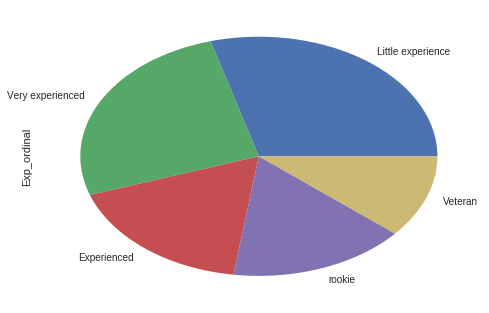

In [0]:
wnba['Exp_ordinal'].value_counts().plot.pie()

## 1.5  Customizing a Pie Chart

The pie chart we generated in the previous exercise is more an ellipsis than a circle, and the **Exp_ordinal** label is unaesthetic and hard to read:

<img width="400" src="https://drive.google.com/uc?export=view&id=1tVBOULsftVpM-DH75lZvNGY09Jdavsik">


To give a pie chart the right shape, we need to specify equal values for height and width in the **figsize** parameter of **Series.plot.pie()**. The **Exp_ordinal** is the label of a hidden y-axis, which means we can use the **plt.ylabel()** function to remove it. This is how we can do this for the **Pos** variable:

```python
>> import matplotlib.pyplot as plt
>> wnba['Pos'].value_counts().plot.pie(figsize = (6,6))
>> plt.ylabel('')
```

<img width="250" src="https://drive.google.com/uc?export=view&id=1-ER6QNonL-CTu6tBMnvdL4PPER17igTt">


Ideally, we'd have proportions or percentages displayed on each wedge of the pie chart. Fortunately, this is easy to get using the **autopct** parameter. This parameter accepts Python string formatting, and we'll use the string **'%.1f%%'** to have percentages displayed with a precision of one decimal place. Let's break down this string formatting:

<center><img width="400" src="https://drive.google.com/uc?export=view&id=1Q6E-FXJCl4qVDplM3tM2n71i21eDk7vi"></center>
  
  
This is how the process looks for the Pos variable:

```ptyhon
>> wnba['Pos'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')
```

<img width="300" src="https://drive.google.com/uc?export=view&id=1KnC3jlcoXgEXKcWMzQvS2hS6kxewrfLY">


Notice that the percentages were automatically determined under the hood, which means we don't have to transform to percentages ourselves using **Series.value_counts(normalize = True) * 100.**

Other display formats are possible, and more documentation on the the syntax of string formatting in Python can be found [here](https://docs.python.org/3/library/string.html#format-specification-mini-language). Documentation on **autopct** and other nice customization parameters can be found [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html).

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Generate and customize a pie chart to visualize the distribution of the **Exp_ordinal** variable.
  - Generate a frequency table for the **Exp_ordinal** variable. Don't sort the table this time.
  - Use the **Series.plot.pie()** method to generate the **pie plot.**
      - Use the **figsize** parameter to specify a **width** and a **height** of 6 inches each.
      - Use the **autopct** parameter to have percentages displayed with a precision of 2 decimal places.
      - Add the following title to the plot: **Percentage of players in WNBA by level of experience.**
      - Remove the **Exp_ordinal** label.



Text(0,0.5,'')

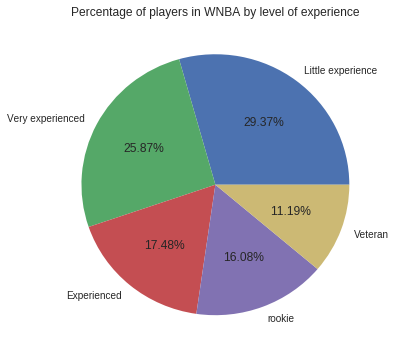

In [0]:
import matplotlib.pyplot as plt

pie = wnba['Exp_ordinal'].value_counts().plot.pie(figsize=(6,6), autopct = '%.2f%%', title="Percentage of players in WNBA by level of experience")

pie.set_ylabel("")

## 1.6 Histograms

Because of the special properties of variables measured on interval and ratio scales, we can describe distributions in more elaborate ways. Let's examine the **PTS** (total points) variable, which is discrete and measured on a ratio scale:

```python
>> wnba['PTS'].describe()
count    143.000000
mean     201.790210
std      153.381548
min        2.000000
25%       75.000000
50%      177.000000
75%      277.500000
max      584.000000
Name: PTS, dtype: float64
```

We can see that 75% of the values are distributed within a relatively narrow interval (between 2 and 277), while the remaining 25% are distributed in an interval that's slightly larger.

<img width="500" src="https://drive.google.com/uc?export=view&id=1eKJa7moOQBWYg5iswrL5KZv6ZHJXZeNJ">


To visualize the distribution of the **PTS** variable, we need to use a graph that allows us to see immediately the patterns outlined above. The most commonly used graph for this scenario is the **histogram**.

To generate a histogram for the **PTS** variable, we can use the **Series.plot.hist()** method directly on the **wnba['PTS']** column (we don't have to generate a frequency table in this case):

```python
>> wnba['PTS'].plot.hist()
```

<img width="500" src="https://drive.google.com/uc?export=view&id=1Qa6ZdGR-918onl80zHS6ckoF5rMRuYOx">

In the next screen, we'll explain the statistics happening under the hood when we run **wnba['PTS'].plot.hist()** and discuss the histogram above in more detail. Until then, let's practice generating the histogram above ourselves.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Using **Series.plot.hist()**, generate a histogram to visualize the distribution of the **PTS** variable.

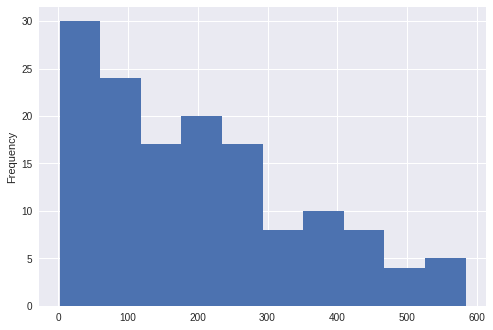

In [0]:
wnba['PTS'].plot.hist()

## 1.7 The Statistics Behind Histograms

Under the hood, the **wnba['PTS'].plot.hist()** method:

- Generated a grouped frequency distribution table for the **PTS** variable with ten class intervals.
- For each class interval it plotted a bar with a height corresponding to the frequency of the interval.

Let's examine the grouped frequency distribution table of the **PTS** variable:

```python
>> wnba['PTS'].describe()
count    143.000000
mean     201.790210
std      153.381548
min        2.000000
25%       75.000000
50%      177.000000
75%      277.500000
max      584.000000
Name: PTS, dtype: float64
```

Each bar in the histogram corresponds to one class interval. To show this is true, we'll generate below the same histogram as in the previous screen, but this time:

- We'll add the values of the x-ticks manually using the xticks parameter.
  - The values will be the limits of each class interval.
  - We use the [arange()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html?highlight=arange#numpy.arange) function from numpy to generate the values and avoid spending time with typing all the values ourselves.
  - We start at 2, not at 1.417, because this is the actual minimum value of the first class interval (we discussed about this in more detail in the previous mission).
- We'll add a **grid** line using the grid parameter to demarcate clearly each bar.
- We'll rotate the tick labels of the x-axis using the rot parameter for better readability.

```python
>> from numpy import arange
>> wnba['PTS'].plot.hist(grid = True, xticks = arange(2,585,58.2), rot = 30)
```

Looking on the histogram above, we can extract the same information as from the grouped frequency table. We can see that there are 20 players in the interval (176.6, 234.8], 10 players in the interval (351.2, 409.4], etc.

More importantly, we can see the patterns we wanted to see in the last screen when we examined the output of **wnba['PTS'].describe()**.


<img width="700" src="https://drive.google.com/uc?export=view&id=1qQtYC5R9oylmOkpx_YjzpCZLv7cUo_5b">



From the output of **wnba['PTS'].describe()** we can see that most of the values (75%) are distributed within a relatively narrow interval (between 2 and 277). This tells us that:

- The values are distributed unevenly across the 2 - 584 range (2 is the minimum value in the **PTS** variable, and 584 is the maximum).
- Most values are clustered in the first (left) part of the the distribution's range.


<img width="500" src="https://drive.google.com/uc?export=view&id=178mhCdacbAzjXqwfDSbVZJtGQ0ucuqzW">


We can immediately see the same two patterns on the histogram above:

- The distribution of values is uneven, with each class interval having a different frequency. If the distribution was even, all the class intervals would have the same frequency.
- Most values (roughly three quarters) are clustered in the left half of the histogram.

While it's easy and fast to make good estimates simply by looking at a histogram, it's always a good idea to add precision to our estimates using the percentile values we get from **Series.describe().**


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Examine the distribution of the **Games Played** variable using the **Series.describe()** method. Just from the output of this method, predict how the histogram of the **Games Played** variable should look like.
- Once you have a good idea of what histogram shape to expect, plot a histogram for the **Games Played** variable using **Series.plot.hist()**.

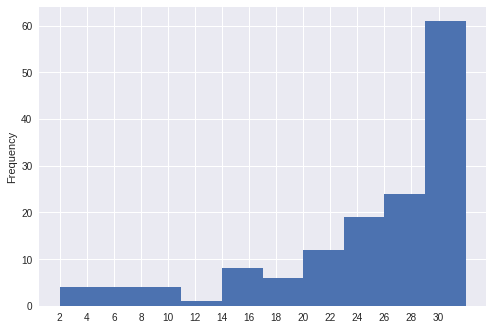

In [0]:
from numpy import arange

wnba['Games Played'].describe()

wnba['Games Played'].plot.hist(grid = True, xticks = arange(2,32,2))

## 1.8 Histograms as Modified Bar Plots


It should now be clear that a histogram is basically the visual form of a grouped frequency table. Structurally, a histogram can also be understood as a modified version of a bar plot. The main difference is that in the case of a histogram there are no gaps between bars, and each bar represents an interval, not a single value.

The main reason we remove the gaps between bars in case of a histogram is that we want to show that the class intervals we plot are adjacent to one another. With the exception of the last interval, the ending point of an interval is the starting point of the next interval, and we want that to be seen on the graph.

<img width="300" src="https://drive.google.com/uc?export=view&id=15v9hcTmgnSArcOD5jwZSlKJQTfwoVtHt">

For bar plots we add gaps because in most cases we don't know whether the unique values of ordinal variables are adjacent to one another in the same way as two class intervals are. It's safer to assume that the values are not adjacent, and add gaps.


<img width="600" src="https://drive.google.com/uc?export=view&id=1Bdl2qABVrU1nGjT1jIha-qwK7B62Caga">


For nominal variables, values can't be numerically ajdacent in principle, and we add gaps to emphasize that the values are fundamentally distinct.

Below we summarize what we've learned so far:


<img width="400" src="https://drive.google.com/uc?export=view&id=19NxFZUcKvnQFnXvvAQl5xjOpnF_reJD-">

## 1.9 Binning for Histograms

You might have noticed that **Series.plot.hist()** splits a distribution by default into 10 class intervals. In the previous mission, we learned that 10 is a good number of class intervals to choose because it offers a good balance between information and comprehensibility.

<img width="400" src="https://drive.google.com/uc?export=view&id=1C8q5Zxpdkd_rILrIr4hqO7jCmoUgT10c">

With histograms, the breakdown point is generally larger than 10 because visualizing a picture is much easier than reading a grouped frequency table. However, once the number of class intervals goes over 30 or so, the granularity increases so much that for some intervals the frequency will be zero. This will result in a discontinued histogram from which is hard to discern patterns.

Below, we can see how the histogram of the **PTS** variable changes as we vary the number of class intervals.


<img width="600" src="https://drive.google.com/uc?export=view&id=1yLJH1J-aXojOhzPg0FICmv6IQ9aXcpn8">


To modify the number of class intervals used for a histogram, we can use the **bins** parameter of **Series.plot.hist()**. A bin is the same thing as a class interval, and, when it comes to histograms, the term "bin" is used much more often.

Also, we'll often want to avoid letting pandas work out the intervals, and use instead intervals that we think make more sense. We can do this in two steps:

- We start with specifying the range of the entire distribution using the **range** parameter of **Series.plot.hist().**
- Then we combine that with the number of bins to get the intervals we want.


Let's say we want to get these three intervals for the distribution of the PTS variable:

- [1, 200)
- [200, 400)
- [400, 600]

If the histogram ranges from 1 to 600, and we specify that we want three bins, then the bins will automatically take the intervals above. This is because the bins must have equal interval lengths, and, at the same time, cover together the entire range between 1 and 600. To cover a range of 600 with three bins, we need each bin to cover 200 points, with the first bin starting at 1, and the last bin ending at 600.


<img width="600" src="https://drive.google.com/uc?export=view&id=1W8a-hbTW_ex0BI53go4xWvjKfMMP-WoO">


This is how we can generate a histogram with three bins and a 1 - 600 range for the **PTS** variable:

```python
>> wnba['PTS'].plot.hist(range = (1,600), bins = 3)
```


<img width="400" src="https://drive.google.com/uc?export=view&id=1O-MfgUUOn1oEfTn1elEkpru5E49XP04c">


If we keep the same range, but change to six bins, then we'll get these six intervals: [1, 100), [100, 200), [200, 300), [300, 400), [400, 500), [500, 600].


```python
>> wnba['PTS'].plot.hist(range = (1,600), bins = 6)
```


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Generate a histogram for the **Games Played** variable, and customize it in the following way:
  - Each bin must cover an interval of 4 games. The first bin must start at 1, the last bin must end at 32.
  - Add the title "The distribution of players by games played".
  - Add a label to the x-axis named "Games played".

Text(0.5,0,'Games played')

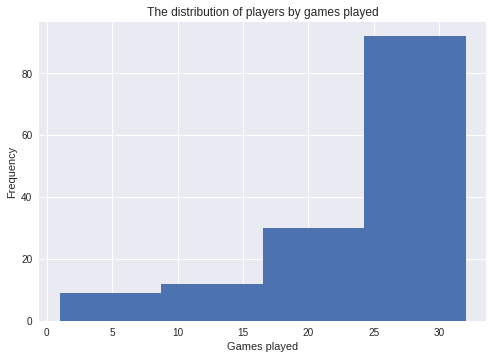

In [31]:
games = wnba['Games Played'].plot.hist(range=(1,32), bins = 4)

games.set_title("The distribution of players by games played")
games.set_xlabel("Games played")


## 1.10 Skewed Distributions

There are a couple of histogram shapes that appear often in practice. So far, we've met two of these shapes:

<img width="600" src="https://drive.google.com/uc?export=view&id=1kosNk32RFOru1alq7taeD9u4DWMWanoi">


In the histogram on the left, we can see that:

- Most values pile up toward the endpoint of the range (32 games played).
- There are less and less values toward the opposite end (0 games played).

On the right histogram, we can see that:

- Most values pile up toward the starting point of the range (0 points).
- There are less and less values toward the opposite end.

Both these histograms show **skewed distributions**. In a skewed distribution:

- The values pile up toward the end or the starting point of the range, making up the body of the distribution.
- Then the values decrease in frequency toward the opposite end, forming the tail of the distribution.


<img width="400" src="https://drive.google.com/uc?export=view&id=1KR4lZFs4Z3D9GrEqpma9wRxRJbBvUzuC">



If the tail points to the left, then the distribution is said to be **left skewed**. When it points to the left, the tail points at the same time in the direction of negative numbers, and for this reason the distribution is sometimes also called **negatively skewed.**

If the tail points to the right, then the distribution is **right skewed**. The distribution is sometimes also said to be **positively skewed** because the tail points in the direction of positive numbers.


<img width="600" src="https://drive.google.com/uc?export=view&id=1FIUz6XuJTcU74IHfJvJP6Il_JkUUXD3g">


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Examine the distribution of the following two variables:
  - **AST** (number of assists).
  - **FT%** (percentage of free throws made out of all attempts).
- Depending on the shape of the distribution, assign the string **'left skewed'** or **'right skewed'** to the following variables:
  - **assists_distro** for the **AST** column.
  - **ft_percent_distro** for the **FT%** column.

For instance, if you think the **AST** variable has a right skewed distribution, your answer should be **assists_distro = 'right skewed'.**

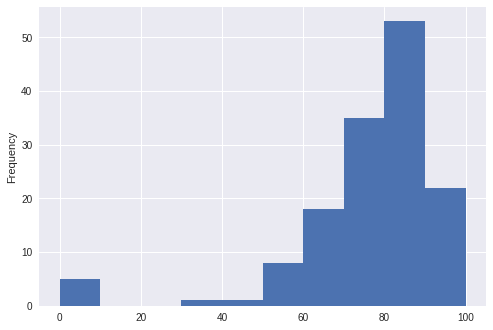

In [34]:
ast = wnba["AST"].plot.hist() #left skewed
ft = wnba["FT%"].plot.hist() #right skewed

## 1.11 Symmetrical Distributions

Besides skewed distributions, we often see histograms with a shape that is more or less symmetrical. If we draw a vertical line exactly in the middle of a symmetrical histogram, then we'll divide the histogram in two halves that are mirror images of one another.



<img width="500" src="https://drive.google.com/uc?export=view&id=1FAOJOZTgCGv6FAQMfFH7ap2HjQok2ZEs">


If the shape of the histogram is **symmetrical**, then we say that we have a **symmetrical distribution.**

A very common symmetrical distribution is one where the values pile up in the middle and gradually decrease in frequency toward both ends of the histogram. This pattern is specific to what we call a **normal distribution** (also called **Gaussian distribution**).



<img width="500" src="https://drive.google.com/uc?export=view&id=16AQYkLid4MnTqFLK8CID3wDWybbKvHgJ">


Another common symmetrical distribution is one where the values are distributed uniformly across the entire range. This pattern is specific to a **uniform distribution.**

<img width="500" src="https://drive.google.com/uc?export=view&id=1WvoDjqD-S-W9qOkqaPt9o3JZs438T9TJ">


In practice, we rarely see perfectly **symmetrical distributions**. However, it's common to use perfectly symmetrical distributions as baselines for describing the distributions we see in practice. For instance, we'd describe the distribution of the **Weight** variable as resembling closely a normal distribution:

```python
>> wnba['Weight'].plot.hist()
```

<img width="400" src="https://drive.google.com/uc?export=view&id=1eoNnxKtW_V5PrdZ5V1P83_YKWKNh61bZ">


When we say that the distribution above resembles closely a normal distribution, we mean that most values pile up somewhere close to the middle and decrease in frequency more or less gradually toward both ends of the histogram.

A similar reasoning applies to skewed distributions. We don't see very often clear-cut skewed distributions, and we use the left and right skewed distributions as baselines for comparison. For instance, we'd say that the distribution of the **BMI** variable is slightly **right skewed**:

```python
>> wnba['BMI'].plot.hist()
```

There's more to say about distribution shapes, and we'll continue this discussion in the next course when we'll learn new concepts. Until then, let's practice what we've learned.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Examine the distribution of the following variables, trying to determine which one resembles the most a normal distribution:
  - Age
  - Height
  - MIN
- Assign to the variable **normal_distribution** the name of the variable (as a string) whose distribution resembles the most a normal one.

For instance, if you think the **MIN** variable is the correct answer, then your answer should be **normal_distribution = 'MIN'.**

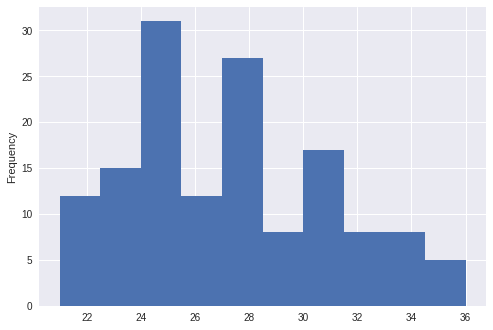

In [40]:
age = wnba['Age'].plot.hist()
height = wnba['Height'].plot.hist() #MOST NORMAL
mini = wnba['MIN'].plot.hist()

## 1.12 Next Steps

In this mission, we learned about the graphs we can use to visualize the distributions of various kinds of variables. If a variable is measured on a nominal or ordinal scale, we can use a bar plot or a pie chart. If the variable is measured on an interval or ratio scale, then a histogram is good choice.

Here's the summary table once again to help you recollect what we did in this mission:

<img width="400" src="https://drive.google.com/uc?export=view&id=19NxFZUcKvnQFnXvvAQl5xjOpnF_reJD-">


We're one mission away from finishing the workflow we set out to complete in the first mission. Next, we'll continue the discussion about data visualization by learning how to compare frequency distributions using graphs.


<img width="600" src="https://drive.google.com/uc?export=view&id=1U88LilHa2asEN9vnC_PQFXz9UtjmRIzh">